(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

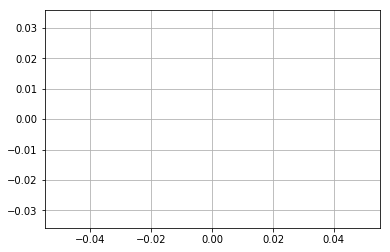

In [2]:
# -*- coding: utf-8 -*-


import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import scipy.optimize

plt.grid()
plt.axis('equal')


In [4]:
# task 1
# Загрузите данные ex2data1.txt из текстового файла.


df = pd.read_csv("G:/Labs/bsuir-labs/11cem/ml/lab02/data/ex2data1.txt", header=None, sep=",", names=['Test1', 'Test2', 'IsTestPassed'])
normalized_data = (df - df.min()) / (df.max() - df.min())


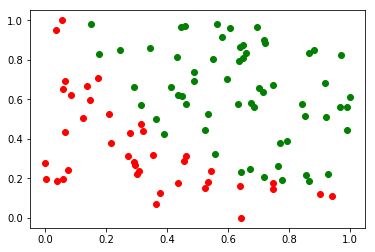

In [5]:

# task 2
# Постройте график, где по осям откладываются оценки по предметам, а точки обозначаются двумя разными маркерами в зависимости от того, поступил ли данный студент в университет или нет.

failedTestResults = normalized_data[normalized_data['IsTestPassed'] == 0]
passedTestResults = normalized_data[normalized_data['IsTestPassed'] == 1]


def ShowData():
    plt.plot(failedTestResults.Test1, failedTestResults.Test2, 'ro')
    plt.plot(passedTestResults.Test1, passedTestResults.Test2, 'go')
    plt.show()


ShowData()

In [6]:

# tetha = np.array([1, 0])
def InitialApproximation(x, y):
    return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

x = np.array(normalized_data.iloc[:, 0:2])
y = np.array(normalized_data.IsTestPassed)

x_passed = np.array(passedTestResults.iloc[:, 0:2])
y_passed = np.array(passedTestResults.IsTestPassed)

x_failed = np.array(failedTestResults.iloc[:, 0:2])
y_failed = np.array(failedTestResults.IsTestPassed)


# tetha = InitialApproximation(x, y)
tetha = np.array([-2.0,0.0])
print("Initial Approximation: "+str(tetha))

Initial Approximation: [-2.  0.]


In [7]:

# task 3
# Реализуйте функции потерь J(θ) и градиентного спуска для логистической регрессии с использованием векторизации.

def get_cost(tetha):
    z = tetha.dot(x_passed.T)
    g = 1/(1+np.exp(-z))
    cost_passed = -np.log(g)
    z = tetha.dot(x_failed.T)
    g = 1/(1+np.exp(-z))
    cost_failed = -np.log(1-g)
    return (sum(cost_failed)+sum(cost_passed))/len(x)
print(get_cost(tetha))

1.1059876480423114


In [8]:

def gradientDescent(x, y, theta, alpha=0.5, iterations = 500):
    tetha_history = [copy.deepcopy(theta)]
    cost_history = [get_cost(copy.deepcopy(theta))]
    for _ in range(iterations):
        h = 1 / (1 + np.exp(-(np.dot(x, theta))))
        gradient = x.T.dot(h - y) / len(y)
        theta -= alpha * gradient
        tetha_history.append(copy.deepcopy(theta))
        cost_history.append(get_cost(copy.deepcopy(theta)))
    return tetha_history, cost_history

result linear function model


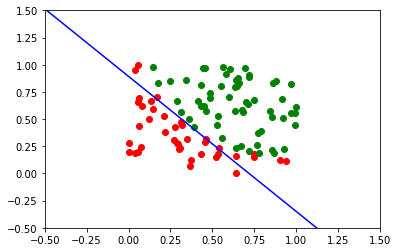

tetha result[1.26891795 0.58032665]
function y=-1.270000*x+0.920000


In [10]:

# task 6
# Постройте разделяющую прямую, полученную в результате обучения модели. Совместите прямую с графиком из пункта 2.
def ShowAnimatedGradientResult(tetha_history):
    fig = plt.figure()
    ax = plt.axes(xlim=(-0.5, 1.5), ylim=(-0.5, 1.5))

    plt.plot(failedTestResults.Test1, failedTestResults.Test2, 'ro')
    plt.plot(passedTestResults.Test1, passedTestResults.Test2, 'go')
    x = np.arange(-10, 10, 0.01)
    k = tetha_history[0][0]
    b = tetha_history[0][1]
    y = [-(i * k + b-1.5) for i in x]
    print("result linear function model")
    line, = plt.plot(x, y, 'b-')

    def animate(i):
        x = np.arange(-10, 10, 0.01)
        k = tetha_history[i][0]
        b = tetha_history[i][1]
        y = [-(i * k + b-1.5) for i in x]
        line.set_data(x, y)
        return line,

    anim = FuncAnimation(fig, animate, frames=len(tetha_history), interval=20, blit=True, repeat=False)
    plt.show()
    plt.cla()
    plt.clf()
    plt.close()

tetha_history, cost_history = gradientDescent(x,y,tetha)
ShowAnimatedGradientResult(tetha_history)
print("tetha result"+str(tetha_history[-1]))

print("function y={0:+f}*x{1:+f}".format(-(round(tetha_history[-1][0], 2)),-(round(tetha_history[-1][1]-1.5, 2))))


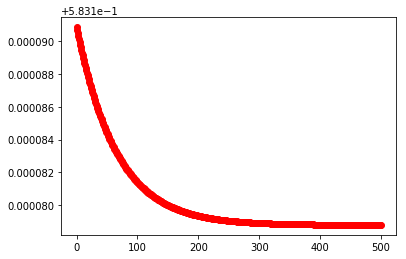

In [11]:
def show_linear_plot(data):
    plt.plot(range(len(data)), data, 'ro')
    plt.show()

show_linear_plot(cost_history)

In [13]:

# task 5
# Реализуйте функцию предсказания вероятности поступления студента в зависимости от значений оценок по экзаменам.

def isTestPassed(tetha, test):
    if test[1]>-(tetha[0]*test[0]+tetha[1] - 1.5):
        print("test passed")
    else:
        print("test failed")


isTestPassed(tetha_history[-1], [0.8, 0.76])
isTestPassed(tetha_history[-1], [0.1, 0.93])
isTestPassed(tetha_history[-1], [0.12, 0.3])
isTestPassed(tetha_history[-1], [0.61, 0.03])

print(1 / (1 + np.exp(-np.dot(tetha_history[-1].copy(), x.copy().T))))

test passed
test passed
test failed
test failed
[0.61919889 0.5292508  0.61416649 0.73524926 0.78092246 0.62054015
 0.7549078  0.72180044 0.78923963 0.75004276 0.7792972  0.69372919
 0.79253467 0.78337    0.63613681 0.71770203 0.71047702 0.69545351
 0.78044632 0.73059362 0.68624903 0.79955189 0.62891584 0.54765558
 0.76794053 0.71511921 0.73742526 0.77144756 0.6780679  0.61089814
 0.71675404 0.77406942 0.66318154 0.67479804 0.62947122 0.65264579
 0.65711628 0.74042124 0.71234228 0.61169783 0.76813138 0.6292483
 0.81278805 0.73817778 0.62506753 0.6829556  0.767822   0.84665869
 0.7585462  0.83375582 0.78204041 0.82012735 0.77009052 0.58285111
 0.6297438  0.64644222 0.82555704 0.64527272 0.75714996 0.76239806
 0.78472926 0.5583906  0.63414069 0.54027018 0.63886459 0.6798414
 0.6809433  0.6287155  0.80788133 0.71617881 0.53903208 0.73520694
 0.79033927 0.71383839 0.71262842 0.83534166 0.69102038 0.68033454
 0.65792091 0.74112048 0.80276444 0.78690843 0.72781925 0.67701827
 0.80659905 0.76

mead
[1.26951671 0.57975246]
Powell
[1.26955055 0.57973591]


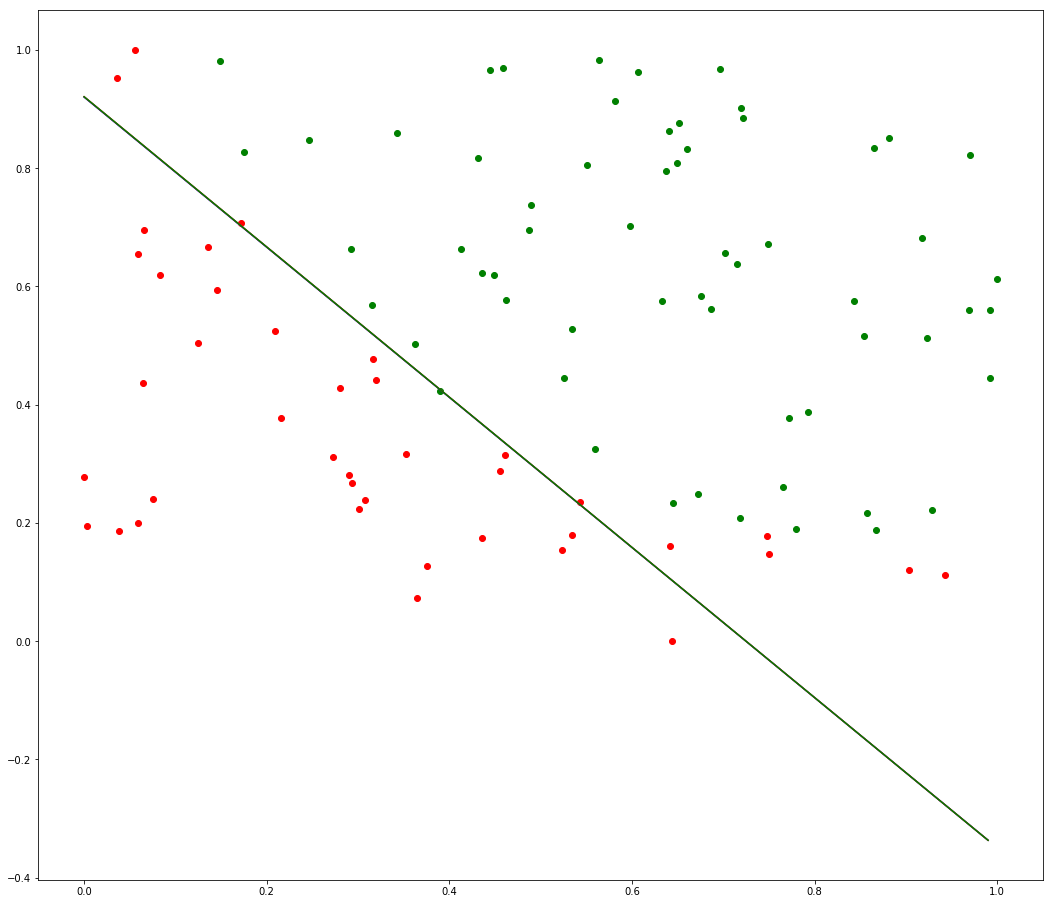

In [16]:

# task 4
# Реализуйте другие методы (как минимум 2) оптимизации для реализованной функции стоимости (например, Метод Нелдера — Мида, Алгоритм Бройдена — Флетчера — Гольдфарба — Шанно, генетические методы и т.п.). Разрешается использовать библиотечные реализации методов оптимизации (например, из библиотеки scipy).

my_tetha = tetha_history[-1]
print("mead")

mead_theta = scipy.optimize.minimize(get_cost, [1.0, 1.0], method='Nelder-Mead').x
print(mead_theta)
print("Powell")
powell_tetha =scipy.optimize.minimize(get_cost, [1.0, 1.0], method='Powell').x
print(powell_tetha)



def ShowComparedData():
    fig = plt.figure(figsize=(18, 16))
    plt.plot(failedTestResults.Test1, failedTestResults.Test2, 'ro')
    plt.plot(passedTestResults.Test1, passedTestResults.Test2, 'go')

    x = np.arange(0, 1, 0.01)
    k = my_tetha[0]
    b = my_tetha[1]
    y = [-(i * k + b-1.5) for i in x]
    line, = plt.plot(x, y, 'b-')

    x = np.arange(0, 1, 0.01)
    k = mead_theta[0]
    b = mead_theta[1]
    y = [-(i * k + b-1.5) for i in x]
    line, = plt.plot(x, y, 'r-')

    x = np.arange(0, 1, 0.01)
    k = powell_tetha[0]
    b = powell_tetha[1]
    y = [-(i * k + b-1.5) for i in x]
    line, = plt.plot(x, y, 'g-')

    plt.show()

ShowComparedData()

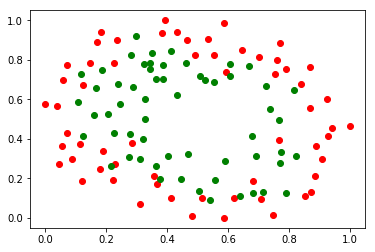

In [18]:
# task 7
# Загрузите данные ex2data2.txt из текстового файла.

df = pd.read_csv("G:/Labs/bsuir-labs/11cem/ml/lab02/data/ex2data2.txt", header=None, sep=",", names=['Test1', 'Test2', 'IsTestPassed'])
normalized_data = (df - df.min()) / (df.max() - df.min())


# task 8
# Постройте график, где по осям откладываются результаты тестов, а точки обозначаются двумя разными маркерами в зависимости от того, прошло ли изделие контроль или нет.

def ShowData(data):
    failedTestResults = data[data['IsTestPassed'] == 0]
    passedTestResults = data[data['IsTestPassed'] == 1]
    plt.plot(failedTestResults.Test1, failedTestResults.Test2, 'ro')
    plt.plot(passedTestResults.Test1, passedTestResults.Test2, 'go')
    plt.show()


ShowData(normalized_data) #todo revert before report

In [19]:

x = np.array(normalized_data.iloc[:, 0:2])
y = np.array(normalized_data.IsTestPassed)


# task 9
# Постройте все возможные комбинации признаков x1 (результат первого теста) и x2 (результат второго теста), в которых степень полинома не превышает 6, т.е. 1, x1, x2, x12, x1x2, x22, …, x1x25, x26 (всего 28 комбинаций).
def GetCombinations(x):
    combination = []
    for entry in x:
        entry_combs = []
        for poly in range(6 + 1):
            for p in range(poly + 1):
                entry_combs.append((entry[0] ** p) * (entry[1] ** poly))
        combination.append(entry_combs)
    return np.array(combination)


combs = GetCombinations(x)
print(x.shape)

(118, 2)


In [20]:

def get_sub_cost(tetha, x, y):
    z = tetha.dot(x.T)
    g = 1 / (1 + np.exp(-z))
    return -np.log(1 - g) if y == 0 else -np.log(g)


def get_cost(tetha, data, features_count):
    x_passed = np.array(data[data['IsTestPassed'] == 1].iloc[:, 0:features_count])
    x_failed = np.array(data[data['IsTestPassed'] == 0].iloc[:, 0:features_count])
    z = tetha.dot(np.hstack((x_passed, np.ones((x_passed.shape[0], 1)))).T)
    g = 1 / (1 + np.exp(-z))
    cost_passed = -np.log(g)

    z = tetha.dot(np.hstack((x_failed, np.ones((x_failed.shape[0], 1)))).T)
    g = 1 / (1 + np.exp(-z))
    cost_failed = -np.log(1 - g)
    return (sum(cost_failed) + sum(cost_passed)) / len(x)


def gradientDescent(x, y, theta, data, alpha=-0.5, iterations=500, features_count=2):
    tetha_history = [theta.copy()]
    cost_history = [get_cost(theta, data, features_count)]
    for _ in range(iterations):
        h = 1 / (1 + np.exp(-(np.dot(x, theta))))
        gradient = x.T.dot(h - y) / len(y)
        theta += alpha * gradient
        tetha_history.append(copy.deepcopy(theta))
        cost_history.append(get_cost(theta.copy(), data, features_count))
    return tetha_history, cost_history


# l2-regulariation
def regularization(theta, X, Y, lambda_=0.1):
    particular_costs = []
    for x, y in zip(X, Y):
        cur_sub_cost = get_sub_cost(theta, x, y) + (lambda_ / (2 * len(X))) * np.sum(theta[1:] ** 2)
        particular_costs.append(cur_sub_cost)
    return 1 / len(X) * sum(particular_costs)


X = x
data_count, feature_count = X.shape
X = np.hstack((X, np.ones((data_count, 1))))

Y = y
theta = np.array([0, 0.1, 0.2])

reg = regularization(theta, X, Y)
print("reg standart" + str(reg))
print("answer:" + str(gradientDescent(X, Y, theta, data=normalized_data)[0][-1]))


sample_tetha = np.array([1.0 for _ in range(combs.shape[1])])
reg28 = regularization(sample_tetha, combs, y)

print("reg28 " + str(reg28))

reg standart0.7031451005359932
answer:[-0.55386963 -0.01685731  0.23141588]
reg28 2.206567021752631


In [21]:

# task 10
# Реализуйте L2-регуляризацию для логистической регрессии и обучите ее на расширенном наборе признаков методом градиентного спуска.

def get_cost28(tetha, x, y, features_count):
    x_passed = x[:58]
    x_failed = x[58:]
    z = tetha.dot(x_passed.T)
    g = 1 / (1 + np.exp(-z))
    cost_passed = -np.log(g)

    z = tetha.dot(x_failed.T)
    g = 1 / (1 + np.exp(-z))
    cost_failed = -np.log(1 - g)
    return (sum(cost_failed) + sum(cost_passed)) / len(x)

alpha=-0.5
iterations=500
features_count=28
tetha = np.array([1.0 for _ in range(combs.shape[1])])

tetha_history = [tetha.copy()]
cost_history = [get_cost28(tetha, combs, y, features_count)]

for _ in range(iterations):
    h = 1 / (1 + np.exp(-(np.dot(combs, tetha))))
    gradient = combs.T.dot(h - y) / len(y)
    tetha += alpha * gradient
    tetha_history.append(tetha.copy())
    cost_history.append(get_cost28(tetha.copy(), combs, y, features_count))

print("polynom tetha")
print(tetha_history[-1], cost_history[-1])

polynom tetha
[-0.53621477  2.19812697  0.08305599  0.83348743 -0.23741095 -1.12991781
 -0.17881143 -0.40004774 -0.72395555 -0.65588675 -0.81894814 -0.46723714
 -0.46083316 -0.29070682 -0.0889877  -1.19666147 -0.47871677 -0.27388135
 -0.04991339  0.15288446  0.31666876 -1.39904541 -0.45532838 -0.13037591
  0.12079869  0.31778755  0.46621223  0.5767259 ] 0.621370808636357


In [22]:

# task 11
# Реализуйте другие методы оптимизации.

def optimized_function(x, y, lambda_=0.00000001):
    print(lambda_)
    m, n = x.shape
    tetha = np.zeros((n + 1, 1))
    x = np.hstack((np.ones((m, 1)), x))
    return scipy.optimize.minimize(regularization, tetha, (x, y, lambda_), method='L-BFGS-B').x
tetha = optimized_function(combs, y)

print("other functions tetha")
print(tetha)

1e-08
other functions tetha
[  -2.30189607   -2.19542831  -16.21647127  118.47085301   21.07964011
  -43.05530655 -516.38486019  127.5667733    85.33735485  279.17424558
  149.66575991 -173.32684813  -10.04444054  163.55042268  203.58930984
  121.8977731  -179.71411765  -51.98835235  -65.31441812   -4.13434098
   19.19864255  -30.75415653  212.06299862   38.22481869 -207.72689493
 -183.05183357 -115.96821803  -99.71169406 -127.29098008]


In [23]:

# task 12
# Реализуйте функцию предсказания вероятности прохождения контроля изделием в зависимости от результатов тестов.


print("predictions per record")
print(1 / (1 + np.exp(-np.dot(tetha.copy(), np.hstack((np.ones((combs.shape[0], 1)), combs)).T))))


predictions per record
[9.53023719e-01 9.76800708e-01 9.65627433e-01 9.87208427e-01
 9.17170272e-01 9.38739011e-01 9.53359060e-01 7.35686030e-01
 5.75965057e-01 4.03558059e-01 4.57824850e-01 6.59348082e-01
 6.76458823e-01 4.25997411e-01 9.04611375e-01 9.66209817e-01
 9.94693897e-01 6.84706281e-01 9.66726475e-01 7.37150663e-01
 1.90958449e-01 6.60841964e-01 5.17687952e-01 2.86661899e-01
 4.46881305e-01 2.24620405e-01 5.94183795e-01 6.91320933e-01
 9.96718237e-01 7.98348674e-01 3.79213198e-01 8.17221509e-01
 9.85527500e-01 9.96188720e-01 9.94868408e-01 9.78412824e-01
 7.72472543e-01 9.15484687e-01 9.45117172e-01 7.10737955e-01
 8.94468092e-01 8.27765709e-01 5.83850262e-01 9.05216735e-01
 7.27216611e-01 9.02093521e-01 5.41522200e-01 9.93540045e-01
 3.25324620e-01 6.10956772e-01 9.92656793e-01 9.98883912e-01
 9.96752233e-01 9.98523496e-01 9.97022109e-01 9.83186661e-01
 9.78270657e-01 7.42146425e-01 3.54872704e-04 2.06906981e-01
 9.44068081e-01 8.71793968e-04 1.71409213e-04 2.61942640e-01
 

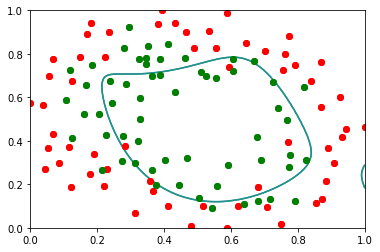

In [24]:

# task 13
# Постройте разделяющую кривую, полученную в результате обучения модели. Совместите прямую с графиком из пункта 7.
def task13( tetha):
    XX = np.linspace(0, 1, 100)
    YY = np.linspace(0, 1, 100)
    ZZ = np.zeros((len(XX), len(YY)))

    for i in range(len(XX)):
        for j in range(len(YY)):
            entry_combs = [1]
            for poly in range(6 + 1):
                for p in range(poly + 1):
                    entry_combs.append((XX[i] ** p) * (YY[j] ** poly))
            ZZ[i, j] = 1 / (1 + np.exp(-tetha.dot(np.array(entry_combs).T)))

    failedTestResults = normalized_data[normalized_data['IsTestPassed'] == 0]
    passedTestResults = normalized_data[normalized_data['IsTestPassed'] == 1]
    plt.plot(failedTestResults.Test1, failedTestResults.Test2, 'ro')
    plt.plot(passedTestResults.Test1, passedTestResults.Test2, 'go')
    plt.contour(XX, YY, ZZ, 0)



task13(tetha) # 0.1
task13(tetha)
plt.show()


0.5


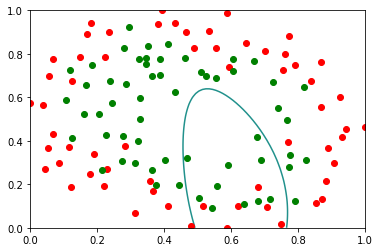

0.0


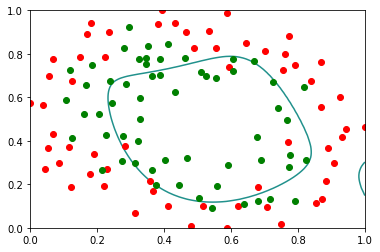

In [25]:

# task 14
# Попробуйте различные значения параметра регуляризации λ. Как выбор данного значения влияет на вид разделяющей кривой? Ответ дайте в виде графиков.


tetha = optimized_function(combs, y, lambda_=0.5)
task13(tetha)
plt.show()

tetha = optimized_function(combs, y, lambda_=0.0)
task13(tetha)
plt.show()


In [27]:
from scipy.io import loadmat

# task 15
# Загрузите данные ex2data3.mat из файла.
data = loadmat('G:/Labs/bsuir-labs/11cem/ml/lab02/data/ex2data3.mat')
x = data['X']
y = data['y']

10


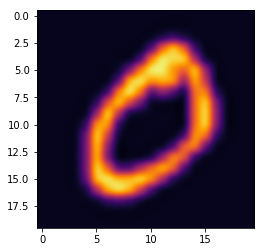

1


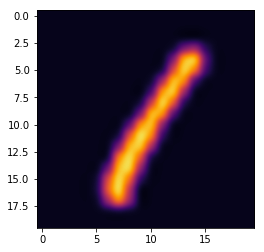

2


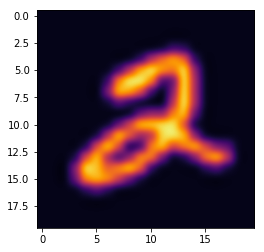

3


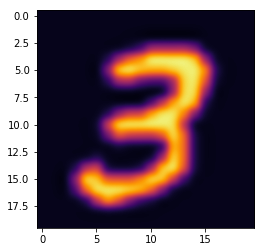

4


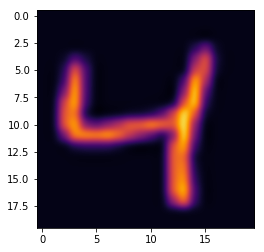

5


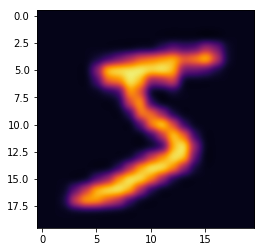

6


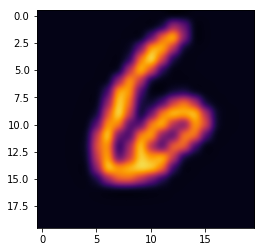

7


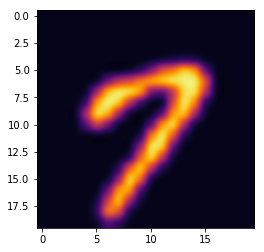

8


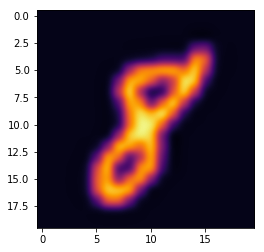

9


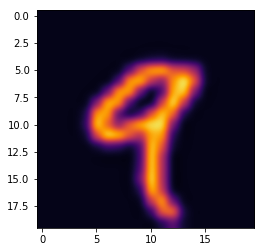

In [29]:

def show_digit(x):
    plt.imshow(np.array(np.split(x, 20)).T, interpolation='gaussian', cmap='inferno')
    plt.show()


# task 16
# Визуализируйте несколько случайных изображений из набора данных. Визуализация должна содержать каждую цифру как минимум один раз.
def show_database(x, y):
    digits = set()
    i = 0
    while len(digits) != 10:
        if y[i][0] not in digits:
            print(y[i][0])
            show_digit(x[i])
            digits.add(int(y[i][0]))
        i += 1
        continue

show_database(x, y) # todo uncomment
X = np.hstack((np.ones((len(x), 1)), x))
_, feature_count = X.shape
l = 0.1
class_count = 10
theta = np.zeros((class_count, feature_count))

In [30]:

# task 17
# Реализуйте бинарный классификатор с помощью логистической регрессии с использованием векторизации (функции потерь и градиентного спуска).


def sig(x):
    return 1 / (1 + np.exp(-x))


def h(theta, X):
    return sig(np.dot(theta, X.T))


def cost(theta, X, y, lambda_=0):
    m = len(y)
    h_theta = sig(np.dot(X, theta))
    J = (1.0 / m) * ((np.dot(-y.T, np.log(h_theta))) - np.dot((1 - y).T, np.log(1 - h_theta))) + (lambda_ / (2 * m)) * sum(theta[1:]**2)
    return J


def grad(theta, X, Y, lambda_=0):
    record_count = len(Y)
    grad = (1.0 / record_count) * np.dot(X.T, (sig(np.dot(X, theta.T)) - Y))
    return grad.T + ((lambda_ / record_count) * theta) # new tetha


cost(theta[0], X, y)
grad(theta, X, y)

array([[-5.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.28764624e-06,  6.02839052e-07,  0.00000000e+00],
       [-5.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.28764624e-06,  6.02839052e-07,  0.00000000e+00],
       [-5.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.28764624e-06,  6.02839052e-07,  0.00000000e+00],
       ...,
       [-5.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.28764624e-06,  6.02839052e-07,  0.00000000e+00],
       [-5.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.28764624e-06,  6.02839052e-07,  0.00000000e+00],
       [-5.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.28764624e-06,  6.02839052e-07,  0.00000000e+00]])

In [31]:

# task 18
# Добавьте L2-регуляризацию к модели.

l = 0.01
cost(theta[0], X, y, l)
grad(theta[0], X, y, l)

array([[-5.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.28764624e-06,  6.02839052e-07,  0.00000000e+00],
       [-5.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.28764624e-06,  6.02839052e-07,  0.00000000e+00],
       [-5.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.28764624e-06,  6.02839052e-07,  0.00000000e+00],
       ...,
       [-5.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.28764624e-06,  6.02839052e-07,  0.00000000e+00],
       [-5.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.28764624e-06,  6.02839052e-07,  0.00000000e+00],
       [-5.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.28764624e-06,  6.02839052e-07,  0.00000000e+00]])

In [32]:

# task 19
# Реализуйте многоклассовую классификацию по методу “один против всех”.

def classify(theta, k, X, Y, C=0.1):
    for i in range(k):
        digit_class = i if i else 10
        current_y = (Y == digit_class).flatten().astype(np.int)
        theta[i] = scipy.optimize.fmin_cg(f=cost, x0=theta[i], fprime=grad, args=(X, current_y, C), maxiter=100)
    return theta


theta = classify(theta, class_count, X, y)
print(theta)


         Current function value: 0.008688
         Iterations: 100
         Function evaluations: 391
         Gradient evaluations: 391
         Current function value: 0.013169
         Iterations: 100
         Function evaluations: 391
         Gradient evaluations: 391
         Current function value: 0.052646
         Iterations: 100
         Function evaluations: 294
         Gradient evaluations: 294
         Current function value: 0.059052
         Iterations: 100
         Function evaluations: 300
         Gradient evaluations: 300
         Current function value: 0.033582
         Iterations: 100
         Function evaluations: 319
         Gradient evaluations: 319
         Current function value: 0.055465
         Iterations: 100
         Function evaluations: 284
         Gradient evaluations: 284
         Current function value: 0.018598
         Iterations: 100
         Function evaluations: 353
         Gradient evaluations: 353
         Current function value: 0.031695

In [34]:

# task 20
# Реализуйте функцию предсказания класса по изображению с использованием обученных классификаторов.


def show_results(X,x,theta):
    for x_extened, x_regular in zip(X, x):
        predictions = [print(str(index) + ":" + str(class_.T.dot(x_extened))) for index, class_ in enumerate(theta)]
        show_digit(x_regular)
        print("___")

#show_results(X,x,theta)

In [35]:

# task 21
# Процент правильных классификаций на обучающей выборке должен составлять около 95%.

successfull_predictions = 0

for x, y_ in zip(X,y):
    predictions = [class_.T.dot(x) for index, class_ in enumerate(theta)]
    cur_y = 0 if y_[0] == 10 else y_[0]
    successfull_predictions += 1 if predictions.index(max(predictions)) == cur_y else 0

print("prediction: " +str(round(successfull_predictions/len(y)*100,2)))

prediction: 95.98
